In [1]:
import numpy as np
import numpy. random as rd
import matplotlib.pyplot as plt

In [2]:
def branchOut(id_root, rad_root, theta_root, R_root, config, tier, file):
    #This funciton recursively generate children nodes (branches) from a given root node
    if tier < len(config):
        global id
        N_process = rd.randint(*config[tier])
        R = R_root / N_process
        for i in range(N_process):
            id += 1
            rad = rad_root * rd.uniform(1.25, 1.75)
            theta = rd.uniform(theta_root - np.pi/6, theta_root + np.pi/6)
            rho = rd.uniform(0.1, 0.14)

            file.write(' '.join(list(map(str, [id, round(rad*np.cos(theta), 5), round(rad*np.sin(theta), 5), 0,
                                               round(R, 5), round(R*np.sqrt(rho), 5), id_root, '\n']))))
            branchOut(id, rad, theta, R, config, tier + 1, file)

In [3]:
def morphGen(config):
    #This function generates random morphology of astrocyte
    #constrained by the range of number of outgoing processes at each tier
    #Input: config - a list of tuple in which each defines the above-mentioned range
    #Example: [(3, 5), (2, 3)] -> This confines the number of primary branches to [3, 5)
    #and the number of secondary branches to [2, 3) (essentially fixing it to 2)
    #Output: swc-like format file
    #Note: a global variable named id must be declared and set to 1 for the function to work
    
    global id
    
    file = open('morph.swc', 'w')

    R_soma = 8  #(umeter) average radius of a soma
    r_soma = round(R_soma * rd.uniform(0.1, 0.14), 5)   
    
    file.write(' '.join(['1', '0', '0', '0', str(R_soma), str(r_soma), "-1\n"]))
    
    N_neurite_tree = rd.randint(*config[0])
    branching_zone = 2*np.pi / N_neurite_tree
    
    for i in range(N_neurite_tree):
        branching_length = rd.uniform(1.5, 2) * R_soma
        branching_angle = rd.uniform(i*branching_zone, (i+1)*branching_zone)
        id += 1
        x = round(branching_length * np.cos(branching_angle), 5)
        y = round(branching_length * np.sin(branching_angle), 5)
        z = 0
        R = R_soma / 10
        r = round(R * rd.uniform(0.1, 0.14), 5)
        
        file.write(' '.join(list(map(str, [id, x, y, z, R, r, 1, '\n']))))
        branchOut(id, branching_length, branching_angle, R, config, 1, file)
    file.close()

In [4]:
id = 1
morphGen([(2, 6), (1, 5), (1, 4), (1, 3)])

In [5]:
def morphShow_mod(fname):
    file = open(fname, 'r')
    data = file.readlines()
            
    for i in range(0, len(data) - 1):
        node = list(map(float, data[i].split()))
        if node[0] != 1:
            parent_node = list(map(float, data[int(node[6]) - 1].split()))
            
        if node[0] == 1:
            soma = plt.Circle((node[1], node[2]), radius=node[4], fc='y', zorder=1000)
            plt.gca().add_patch(soma)
        else:
            segment = plt.Line2D((node[1], parent_node[1]), (node[2], parent_node[2]), lw=node[4] * 10)
            plt.gca().add_line(segment)

    plt.axis('equal')       
    plt.show()
    file.close()

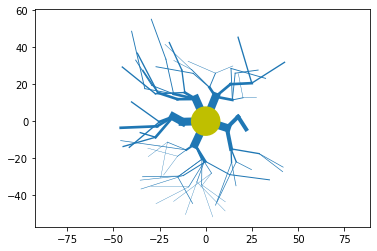

In [6]:
morphShow_mod('morph.swc')